In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y)

### Затем построим первый классификатор. Оценка его точности даст нам приблизительную оценку уровня общей эффективности простых неоптимизированных моделей:

In [ ]:
clf = SVC(C=0.01)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6525821596244131
0.5524475524475524


Для более точного анализа попробуем выяснить, что происходит с точностью при обучении на части обучающей выборки в зависимости от количества используемых точек. Для этого организуем обучение в цикле (обратите внимание на использование функции linspace):

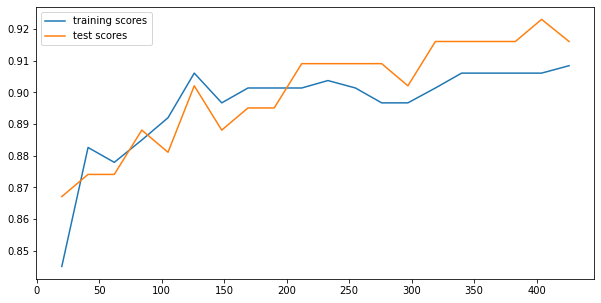

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):
    clf = SVC(C=10, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y)

## Сплитим нашу выборку 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_2d, y, 
                                                    test_size=0.2,
                                                    random_state=True)

### Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [ ]:
model = svm.SVC(kernel='rbf', C=10**5)
start_time = time.time()
model.fit(x_train, y_train)
print(f"{(time.time() - start_time)} seconds время обучения модели классификаторa на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01")

4.208644390106201 seconds время обучения модели классификаторa на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01


In [ ]:
df_differences = pd.DataFrame(columns=['Метод опорных векторов с гауссовым ядром (SVC)', 'Метод опорных векторов с линейным ядром (SVC)', 'Метод опорных векторов с полиномиальном ядром (SVC)'],index=[f'10^({i})' for i in range(-4,7)])
df_differences.loc['10^(-1)','Метод опорных векторов с гауссовым ядром (SVC)']

nan

### Для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

In [ ]:
c_array = [10**i for i in range(-4,7)]
learning_models = {
    "Метод опорных векторов с гауссовым ядром (SVC)": 'rbf',
    "Метод опорных векторов с линейным ядром (SVC)": 'linear',
    "Метод опорных векторов с полиномиальном ядром (SVC)": 'poly'  
}


str_i = -4
for C in c_array: 
  for name, kernel in learning_models.items():
      start_time = time.time()
      model = svm.SVC(kernel=kernel, probability=True, C=C)
      model.fit(x_train, y_train)
      print(f"{(time.time() - start_time)} seconds время обучения модели {name}")
      df_differences.loc[f'10^({str_i})', name] = (round(model.score(x_train, y_train),4), round(model.score(x_test, y_test),4))
  str_i += 1


0.08096837997436523 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
0.03728485107421875 seconds время обучения модели Метод опорных векторов с линейным ядром (SVC)
0.02578115463256836 seconds время обучения модели Метод опорных векторов с полиномиальном ядром (SVC)
0.0927271842956543 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
0.031112194061279297 seconds время обучения модели Метод опорных векторов с линейным ядром (SVC)
0.018658161163330078 seconds время обучения модели Метод опорных векторов с полиномиальном ядром (SVC)
0.14580082893371582 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
0.03658318519592285 seconds время обучения модели Метод опорных векторов с линейным ядром (SVC)
0.02161717414855957 seconds время обучения модели Метод опорных векторов с полиномиальном ядром (SVC)
0.04558968544006348 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
0.018646955490112

In [ ]:
df_differences

,Метод опорных векторов с гауссовым ядром (SVC),Метод опорных векторов с линейным ядром (SVC),Метод опорных векторов с полиномиальном ядром (SVC)
10^(-4),"[(0.6264, 0.6316)]","[(0.6703, 0.6491)]","[(0.8835, 0.8158)]"
10^(-3),"[(0.6264, 0.6316)]","[(0.8725, 0.8333)]","[(0.9121, 0.8333)]"
10^(-2),"[(0.7385, 0.693)]","[(0.8923, 0.8509)]","[(0.9231, 0.8421)]"
10^(-1),"[(0.9143, 0.8333)]","[(0.9011, 0.8421)]","[(0.9165, 0.8333)]"
10^(0),"[(0.9275, 0.8333)]","[(0.9011, 0.8509)]","[(0.9209, 0.8333)]"
10^(1),"[(0.9297, 0.8158)]","[(0.9011, 0.8509)]","[(0.9209, 0.8333)]"
10^(2),"[(0.9275, 0.8421)]","[(0.9011, 0.8509)]","[(0.9209, 0.8158)]"
10^(3),"[(0.9231, 0.8158)]","[(0.8967, 0.8596)]","[(0.9209, 0.8246)]"
10^(4),"[(0.9253, 0.8246)]","[(0.9033, 0.8596)]","[(0.9121, 0.8246)]"
10^(5),"[(0.9275, 0.8333)]","[(0.9055, 0.8596)]","[(0.9099, 0.8246)]"


### Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.

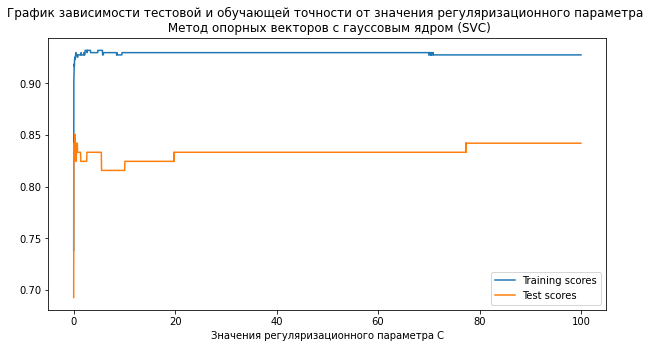

In [ ]:
learning_models = {
    "Метод опорных векторов с гауссовым ядром (SVC)": 'rbf' 
}
training_scores = []
test_scores = []
numbers = []

for C in range(1, 10000): 
    name, kernel = list(learning_models.items())[0]
    model = svm.SVC(kernel=kernel, probability=True, C=C*0.01)
    model.fit(x_train, y_train)
    numbers.append(C*0.01)
    training_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="Training scores")
plt.plot(numbers, test_scores, label="Test scores")
plt.legend(loc="best")
plt.title(f'График зависимости тестовой и обучающей точности от значения регуляризационного параметра \n {name}')
plt.xlabel('Значения регуляризационного параметра C');

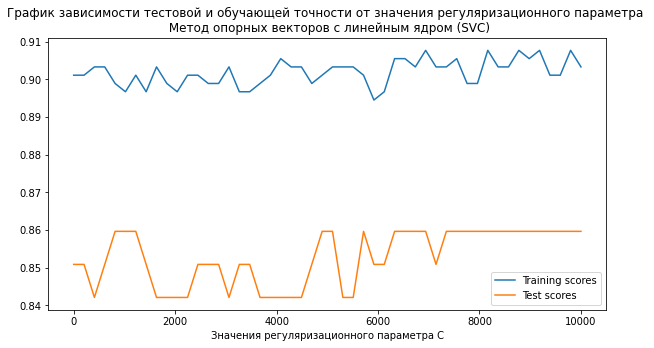

In [ ]:
c_array = [10**i for i in range(-4,7)]
learning_models = {
    "Метод опорных векторов с линейным ядром (SVC)": 'linear' 
}
training_scores = []
test_scores = []
numbers = []

for C in np.linspace(1, 10000): 
    name, kernel = list(learning_models.items())[0]
    start_time = time.time()
    model = svm.SVC(kernel=kernel, probability=True, C=C)
    model.fit(x_train, y_train)
    numbers.append(C)
    training_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="Training scores")
plt.plot(numbers, test_scores, label="Test scores")
plt.legend(loc="best")
plt.title(f'График зависимости тестовой и обучающей точности от значения регуляризационного параметра \n {name}')
plt.xlabel('Значения регуляризационного параметра C');

# **Повторите данное исследование на полном датасете. Сделайте выводы об оптимальной регуляризации моделей.**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=True)

### Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [ ]:
model = svm.SVC(kernel='rbf', C=10**5)
start_time = time.time()
model.fit(x_train, y_train)
print(f"{(time.time() - start_time)} seconds время обучения модели классификаторa на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01")

0.0888671875 seconds время обучения модели классификаторa на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01


In [ ]:
df_differences = pd.DataFrame(columns=['Метод опорных векторов с гауссовым ядром (SVC)', 'Метод опорных векторов с линейным ядром (SVC)', 'Метод опорных векторов с полиномиальном ядром (SVC)'],index=[f'10^({i})' for i in range(-4,7)])
df_differences.loc['10^(-1)','Метод опорных векторов с гауссовым ядром (SVC)']

nan

### Для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

In [ ]:
c_array = [10**i for i in range(-4,7)]
learning_models = {
    "Метод опорных векторов с гауссовым ядром (SVC)": 'rbf',
    "Метод опорных векторов с линейным ядром (SVC)": 'linear',
    "Метод опорных векторов с полиномиальном ядром (SVC)": 'poly'  
}


str_i = -4
for C in c_array: 
  for name, kernel in learning_models.items():
      start_time = time.time()
      model = svm.SVC(kernel=kernel, probability=True, C=C)
      model.fit(x_train, y_train)
      print(f"{(time.time() - start_time)} seconds время обучения модели {name}")
      df_differences.loc[f'10^({str_i})', name] = (round(model.score(x_train, y_train),4), round(model.score(x_test, y_test),4))
  str_i += 1


0.07390189170837402 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
0.014111518859863281 seconds время обучения модели Метод опорных векторов с линейным ядром (SVC)
0.03916621208190918 seconds время обучения модели Метод опорных векторов с полиномиальном ядром (SVC)
0.0623016357421875 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
0.023154020309448242 seconds время обучения модели Метод опорных векторов с линейным ядром (SVC)
0.038665056228637695 seconds время обучения модели Метод опорных векторов с полиномиальном ядром (SVC)
0.06810688972473145 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
0.13440847396850586 seconds время обучения модели Метод опорных векторов с линейным ядром (SVC)
0.023187875747680664 seconds время обучения модели Метод опорных векторов с полиномиальном ядром (SVC)
0.038167715072631836 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
0.777274131774

In [ ]:
df_differences

,Метод опорных векторов с гауссовым ядром (SVC),Метод опорных векторов с линейным ядром (SVC),Метод опорных векторов с полиномиальном ядром (SVC)
10^(-4),"(0.6264, 0.6316)","(0.9319, 0.9386)","(0.6418, 0.6404)"
10^(-3),"(0.6264, 0.6316)","(0.9495, 0.9298)","(0.7692, 0.6754)"
10^(-2),"(0.8198, 0.7193)","(0.956, 0.9386)","(0.8462, 0.7982)"
10^(-1),"(0.8967, 0.8596)","(0.9626, 0.9474)","(0.8923, 0.8596)"
10^(0),"(0.9231, 0.9035)","(0.9736, 0.9561)","(0.9165, 0.8947)"
10^(1),"(0.9275, 0.8947)","(0.9538, 0.9649)","(0.9231, 0.9035)"
10^(2),"(0.9385, 0.9298)","(0.9648, 0.9649)","(0.9385, 0.9035)"
10^(3),"(0.956, 0.9649)","(0.9648, 0.9561)","(0.9451, 0.9123)"
10^(4),"(0.9626, 0.9561)","(0.967, 0.9561)","(0.956, 0.9474)"
10^(5),"(0.9736, 0.9474)","(0.967, 0.9561)","(0.9648, 0.9649)"


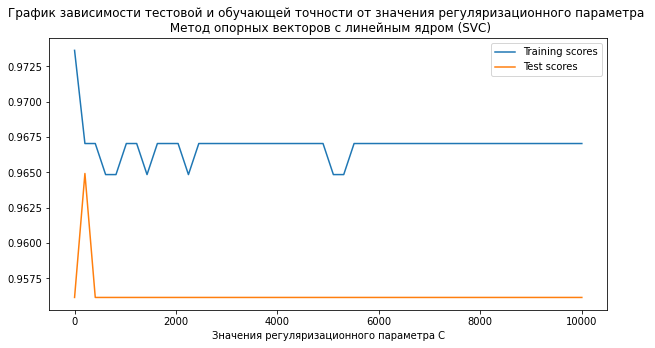

In [ ]:
c_array = [10**i for i in range(-4,7)]
learning_models = {
    "Метод опорных векторов с линейным ядром (SVC)": 'linear' 
}
training_scores = []
test_scores = []
numbers = []

for C in np.linspace(1, 10000): 
    name, kernel = list(learning_models.items())[0]
    start_time = time.time()
    model = svm.SVC(kernel=kernel, probability=True, C=C)
    model.fit(x_train, y_train)
    numbers.append(C)
    training_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="Training scores")
plt.plot(numbers, test_scores, label="Test scores")
plt.legend(loc="best")
plt.title(f'График зависимости тестовой и обучающей точности от значения регуляризационного параметра \n {name}')
plt.xlabel('Значения регуляризационного параметра C');

# **Повторите данное исследование на другом датасете. Предпочтительно выбирать более объемный набор данных для классификации (несколько тысяч примеров на каждый класс).**

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары'

/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары


In [ ]:
df = pd.read_csv('heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
target = "HeartDisease"
Y = df[target]
X = pd.get_dummies(df.drop(target, axis=1))

## Сплитим нашу выборку 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

### Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [ ]:
model = svm.SVC(kernel='rbf', C=10**5)
start_time = time.time()
model.fit(x_train, y_train)
print(f"{(time.time() - start_time)} seconds время обучения модели классификаторa на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01")

2.8339579105377197 seconds время обучения модели классификаторa на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01


In [ ]:
df_differences = pd.DataFrame(columns=['Метод опорных векторов с гауссовым ядром (SVC)', 'Метод опорных векторов с линейным ядром (SVC)', 'Метод опорных векторов с полиномиальном ядром (SVC)'],index=[f'10^({i})' for i in range(-4,7)])
df_differences.loc['10^(-1)','Метод опорных векторов с гауссовым ядром (SVC)']

nan

### Для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

In [ ]:
c_array = [10**i for i in range(-4,7)]
learning_models = {
    "Метод опорных векторов с гауссовым ядром (SVC)": 'rbf',
    "Метод опорных векторов с линейным ядром (SVC)": 'linear',
    "Метод опорных векторов с полиномиальном ядром (SVC)": 'poly'  
}


str_i = -4
for C in c_array: 
  for name, kernel in learning_models.items():
      start_time = time.time()
      model = svm.SVC(kernel=kernel, probability=True, C=C)
      model.fit(x_train, y_train)
      print(f"{(time.time() - start_time)} seconds время обучения модели {name}")
      df_differences.loc[f'10^({str_i})', name] = (round(model.score(x_train, y_train),4), round(model.score(x_test, y_test),4))
  str_i += 1


0.16914653778076172 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
0.08119964599609375 seconds время обучения модели Метод опорных векторов с линейным ядром (SVC)
0.10322737693786621 seconds время обучения модели Метод опорных векторов с полиномиальном ядром (SVC)
0.16324901580810547 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
0.11547589302062988 seconds время обучения модели Метод опорных векторов с линейным ядром (SVC)
0.11185288429260254 seconds время обучения модели Метод опорных векторов с полиномиальном ядром (SVC)
0.1591947078704834 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
0.32286787033081055 seconds время обучения модели Метод опорных векторов с линейным ядром (SVC)
0.10111069679260254 seconds время обучения модели Метод опорных векторов с полиномиальном ядром (SVC)
0.16141128540039062 seconds время обучения модели Метод опорных векторов с гауссовым ядром (SVC)
1.5935816764831543 

In [ ]:
df_differences

,Метод опорных векторов с гауссовым ядром (SVC),Метод опорных векторов с линейным ядром (SVC),Метод опорных векторов с полиномиальном ядром (SVC)
10^(-4),"(0.5422, 0.5978)","(0.7044, 0.6848)","(0.5422, 0.5978)"
10^(-3),"(0.5422, 0.5978)","(0.7779, 0.788)","(0.5422, 0.5978)"
10^(-2),"(0.5422, 0.5978)","(0.8488, 0.9022)","(0.5599, 0.6141)"
10^(-1),"(0.6267, 0.5054)","(0.8651, 0.9076)","(0.6989, 0.7065)"
10^(0),"(0.7193, 0.7174)","(0.8638, 0.9076)","(0.7248, 0.7391)"
10^(1),"(0.748, 0.7554)","(0.8651, 0.913)","(0.7684, 0.7989)"
10^(2),"(0.8392, 0.8533)","(0.8583, 0.8913)","(0.8351, 0.8913)"
10^(3),"(0.8651, 0.8967)","(0.8597, 0.9022)","(0.8583, 0.913)"
10^(4),"(0.8896, 0.875)","(0.861, 0.9022)","(0.8719, 0.8967)"
10^(5),"(0.906, 0.8804)","(0.861, 0.9022)","(0.8883, 0.8913)"


In [ ]:
c_array = [10**i for i in range(-4,7)]
learning_models = {
    "Метод опорных векторов с линейным ядром (SVC)": 'linear' 
}
training_scores = []
test_scores = []
numbers = []

for C in np.linspace(1, 10000): 
    name, kernel = list(learning_models.items())[0]
    start_time = time.time()
    model = svm.SVC(kernel=kernel, probability=True, C=C)
    model.fit(x_train, y_train)
    numbers.append(C)
    training_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="Training scores")
plt.plot(numbers, test_scores, label="Test scores")
plt.legend(loc="best")
plt.title(f'График зависимости тестовой и обучающей точности от значения регуляризационного параметра \n {name}')
plt.xlabel('Значения регуляризационного параметра C');

KeyboardInterrupt: ignored

# **Напишите функцию, которая автоматизирует процесс подбора гиперпараметров данной модели путем проверки ошибок на тестовой выборке моделей с разными значениями гиперпараметра. Сравните вашу реализацию с функцией GridSearch.**

In [ ]:
def auto_hyperparameter(X,Y, kernel):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

  c_array = [10**i for i in range(-4,4)]
  best_score = np.array([])

  for C in c_array:
    model = svm.SVC(kernel=kernel, probability=True, C=C)
    model.fit(x_train, y_train)
    best_score = np.append(best_score,[C, model.score(x_test, y_test)], axis=0)

  best_score = best_score.reshape((len(c_array), 2)) 
  return f'C = {best_score.max(axis=0)[0]}, score = {best_score.max(axis=0)[1]}'

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
auto_hyperparameter(X=X,Y=y, kernel='linear')

'C = 1000000.0, score = 0.9649122807017544'

In [ ]:
c_array = [10**i for i in range(-4,7)]
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':c_array}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000, 100000, 1000000],
                         'kernel': ('linear', 'rbf', 'poly')})

In [ ]:
clf.score(X_test, y_test)

0.972027972027972

In [ ]:
clf.best_params_

{'C': 100, 'kernel': 'linear'}